<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering
---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.2'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46
# Boston is regression dataset.
# The values in "medv" columns are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 Download the "boston" dataset to local system** 
---

In [5]:
bostonDataSet.to_csv("bostonDataSet.csv")
from google.colab import files
#files.download('bostonDataSet.csv')          # Uncomment this line

---
### **1.4 "Parameter setting"  for all regression models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [6]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', train_size=0.7, silent=True)

,Description,Value
0,session_id,3340
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 "Run and Compare" the model performance**
---

In [7]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.4043,12.3083,3.4096,0.8394,0.1576,0.1239,0.095
et,Extra Trees Regressor,2.2215,12.2994,3.3530,0.8392,0.1477,0.1124,0.442
rf,Random Forest Regressor,2.4191,12.7495,3.4912,0.8372,0.1583,0.1242,0.500
lightgbm,Light Gradient Boosting Machine,2.4628,14.8272,3.7252,0.8038,0.1672,0.1279,0.084
ada,AdaBoost Regressor,2.9469,16.3445,3.9240,0.7936,0.1894,0.1598,0.094
lr,Linear Regression,3.3997,23.7705,4.7141,0.7113,0.2297,0.1674,0.276
ridge,Ridge Regression,3.3740,23.8510,4.7187,0.7095,0.2307,0.1666,0.014
br,Bayesian Ridge,3.3991,24.3796,4.7797,0.7019,0.2273,0.1676,0.014
lar,Least Angle Regression,3.5655,25.7250,4.8901,0.6940,0.2501,0.1774,0.017
en,Elastic Net,3.8261,30.1592,5.3781,0.6378,0.2336,0.1801,0.014


---
### **1.6 "Three line of code" for model comparison for "Insurance" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2472.0859,2.099619e+07,4545.4691,0.8536,0.4175,0.2937,0.088
rf,Random Forest Regressor,2663.6028,2.389454e+07,4849.1787,0.8331,0.4596,0.3205,0.560
lightgbm,Light Gradient Boosting Machine,2826.8339,2.403065e+07,4855.9973,0.8326,0.5123,0.3422,0.053
et,Extra Trees Regressor,2599.3813,2.673261e+07,5138.0740,0.8139,0.4689,0.3014,0.499
ada,AdaBoost Regressor,4035.9390,2.711737e+07,5193.2745,0.8115,0.6164,0.6950,0.033
llar,Lasso Least Angle Regression,4185.9467,3.705653e+07,6066.8680,0.7433,0.5572,0.4204,0.015
ridge,Ridge Regression,4200.5827,3.706772e+07,6068.0699,0.7432,0.5577,0.4231,0.014
br,Bayesian Ridge,4198.6547,3.707184e+07,6068.4807,0.7431,0.5588,0.4227,0.014
lr,Linear Regression,4192.1830,3.708926e+07,6070.1484,0.7430,0.5639,0.4215,0.014
lasso,Lasso Regression,4191.6310,3.708253e+07,6069.4915,0.7430,0.5629,0.4214,0.014


---
### **1.7 "Three line of code" for model comparison for "House" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16861.3431,6.888178e+08,25531.4245,0.8830,0.1363,0.1009,0.762
lightgbm,Light Gradient Boosting Machine,17586.9693,7.771148e+08,27415.5510,0.8662,0.1447,0.1048,0.237
rf,Random Forest Regressor,18711.3700,9.098492e+08,29619.3335,0.8423,0.1554,0.1138,2.372
et,Extra Trees Regressor,21998.7262,1.180246e+09,33991.1207,0.7931,0.1730,0.1292,2.520
omp,Orthogonal Matching Pursuit,17519.7572,1.094727e+09,30252.1628,0.7861,0.1505,0.1071,0.036
ada,AdaBoost Regressor,25441.7695,1.257565e+09,35005.9919,0.7816,0.2024,0.1658,0.491
ridge,Ridge Regression,18774.4826,1.192225e+09,32289.0299,0.7642,0.1659,0.1133,0.058
lasso,Lasso Regression,18113.0194,1.252895e+09,32389.7545,0.7492,0.1742,0.1102,0.205
llar,Lasso Least Angle Regression,17608.6563,1.235869e+09,31472.6537,0.7484,0.1566,0.1091,0.441
en,Elastic Net,21738.6721,1.520718e+09,37074.4566,0.7066,0.1693,0.1273,0.208


---
# **2. Regression: working with user dataset**
---
### **2.1 Uploading "user file" from user system**

In [10]:
from google.colab import files
#files.upload()                     # Uncomment this line

---
### **2.2 "Read" the uploaded file**
---

In [11]:
import pandas as pd
#myDataSet = pd.read_csv('Sample1 - Regression data.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

---
### **2.3 "Compare" the model performance**
---

In [12]:
from pycaret.regression import *

#s = setup(data = myDataSet, target='RMSD', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

---
### **2.4 "Three line of code" for model comparison for "user dataset**
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [13]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [14]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0944,8.6724,2.8868,0.8971,0.1455,0.1124,0.095
et,Extra Trees Regressor,2.0940,9.5907,2.9980,0.8867,0.1396,0.1093,0.461
rf,Random Forest Regressor,2.2268,10.5342,3.1412,0.8781,0.1493,0.1170,0.519
lightgbm,Light Gradient Boosting Machine,2.2776,11.4872,3.2946,0.8661,0.1547,0.1185,0.040
ada,AdaBoost Regressor,2.7196,14.3600,3.7029,0.8293,0.1764,0.1467,0.096
dt,Decision Tree Regressor,2.8285,15.0395,3.7807,0.8187,0.1865,0.1447,0.017
knn,K Neighbors Regressor,2.8781,18.1048,4.1595,0.7827,0.1750,0.1398,0.061
br,Bayesian Ridge,3.3571,22.9431,4.6934,0.7254,0.2411,0.1713,0.014
ridge,Ridge Regression,3.4090,23.0186,4.7084,0.7236,0.2443,0.1733,0.013
lr,Linear Regression,3.4297,23.1371,4.7231,0.7218,0.2441,0.1742,0.013


---
### **3.2 Model performance using "Feature Selection"**
---

In [15]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0744,1.115980e+01,3.1576,8.541000e-01,0.1412,0.1071,0.450
gbr,Gradient Boosting Regressor,2.1559,1.189080e+01,3.2905,8.440000e-01,0.1466,0.1125,0.098
lightgbm,Light Gradient Boosting Machine,2.3071,1.311170e+01,3.4701,8.267000e-01,0.1525,0.1174,0.039
rf,Random Forest Regressor,2.3253,1.357190e+01,3.4824,8.231000e-01,0.1508,0.1178,0.503
ada,AdaBoost Regressor,2.8142,1.738990e+01,4.0006,7.712000e-01,0.1848,0.1516,0.097
lr,Linear Regression,3.2463,2.178260e+01,4.5911,7.183000e-01,0.2326,0.1663,0.013
ridge,Ridge Regression,3.2334,2.214000e+01,4.6227,7.147000e-01,0.2456,0.1676,0.013
dt,Decision Tree Regressor,3.1347,2.250170e+01,4.5632,7.115000e-01,0.2020,0.1533,0.017
br,Bayesian Ridge,3.2691,2.309430e+01,4.7249,7.022000e-01,0.2652,0.1701,0.015
en,Elastic Net,3.6068,2.702700e+01,5.1410,6.488000e-01,0.2739,0.1789,0.015


---
### **3.3 Model performance using "Outlier Removal"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0556,9.788900e+00,2.9536,0.8683,0.1300,0.1013,0.445
gbr,Gradient Boosting Regressor,2.2756,1.125580e+01,3.2316,0.8471,0.1423,0.1117,0.092
rf,Random Forest Regressor,2.2995,1.226430e+01,3.3678,0.8285,0.1451,0.1131,0.511
ada,AdaBoost Regressor,2.7183,1.421060e+01,3.6118,0.8088,0.1648,0.1392,0.097
lightgbm,Light Gradient Boosting Machine,2.4069,1.369540e+01,3.5514,0.8027,0.1496,0.1159,0.038
dt,Decision Tree Regressor,2.9135,1.874320e+01,4.1850,0.7346,0.1876,0.1429,0.016
lr,Linear Regression,3.4102,2.386400e+01,4.8398,0.6860,0.2644,0.1647,0.015
ridge,Ridge Regression,3.3937,2.407830e+01,4.8626,0.6812,0.2665,0.1645,0.014
br,Bayesian Ridge,3.4007,2.464770e+01,4.9214,0.6726,0.2617,0.1654,0.014
lasso,Lasso Regression,3.7606,2.930580e+01,5.3650,0.6177,0.2731,0.1743,0.014


---
### **3.4 Model performance using "Transformation"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1375,8.7772,2.9216,0.8819,0.1362,0.1102,0.092
et,Extra Trees Regressor,2.1336,10.4846,3.1396,0.8740,0.1348,0.1051,0.450
rf,Random Forest Regressor,2.2271,10.5977,3.1937,0.8659,0.1371,0.1094,0.513
lightgbm,Light Gradient Boosting Machine,2.4525,12.9606,3.5026,0.8460,0.1483,0.1192,0.039
ada,AdaBoost Regressor,2.8099,13.3842,3.6208,0.8234,0.1795,0.1540,0.095
knn,K Neighbors Regressor,2.9270,18.6767,4.1803,0.7788,0.1783,0.1403,0.062
br,Bayesian Ridge,3.3605,20.9322,4.4776,0.7446,0.2206,0.1776,0.013
ridge,Ridge Regression,3.3826,21.0140,4.4927,0.7427,0.2218,0.1783,0.014
lr,Linear Regression,3.3967,21.1283,4.5067,0.7410,0.2225,0.1788,0.014
lar,Least Angle Regression,3.4011,21.1669,4.5107,0.7405,0.2229,0.1791,0.016


---
### **3.5 Model performance using "PCA"**
---

In [18]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.8695,51.5460,7.0414,0.3746,0.2846,0.2373,0.398
gbr,Gradient Boosting Regressor,4.8489,52.2813,7.1233,0.3669,0.2772,0.2287,0.058
rf,Random Forest Regressor,4.9239,53.2424,7.1835,0.3593,0.2849,0.2341,0.440
lightgbm,Light Gradient Boosting Machine,5.0518,55.1464,7.3173,0.3305,0.2859,0.2386,0.030
knn,K Neighbors Regressor,5.2901,56.9993,7.4732,0.2997,0.2994,0.2577,0.060
lr,Linear Regression,5.5276,61.3253,7.6862,0.2765,0.2973,0.2581,0.013
lasso,Lasso Regression,5.5329,61.3294,7.6861,0.2765,0.2974,0.2584,0.014
ridge,Ridge Regression,5.5276,61.3253,7.6862,0.2765,0.2973,0.2581,0.012
en,Elastic Net,5.5304,61.3269,7.6861,0.2765,0.2974,0.2582,0.014
lar,Least Angle Regression,5.5276,61.3253,7.6862,0.2765,0.2973,0.2581,0.013


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [19]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1763,10.9452,3.1922,0.8317,0.1400,0.1072,0.450
gbr,Gradient Boosting Regressor,2.1963,11.2152,3.2453,0.8275,0.1430,0.1104,0.091
lightgbm,Light Gradient Boosting Machine,2.4039,13.1123,3.4767,0.8231,0.1537,0.1191,0.038
rf,Random Forest Regressor,2.3561,13.2131,3.4870,0.8013,0.1513,0.1183,0.509
ada,AdaBoost Regressor,2.8263,16.1482,3.8896,0.7575,0.1765,0.1457,0.093
knn,K Neighbors Regressor,2.9225,19.6256,4.2461,0.7305,0.1770,0.1379,0.062
huber,Huber Regressor,3.1015,22.9560,4.6251,0.6672,0.2402,0.1523,0.028
br,Bayesian Ridge,3.2379,22.8289,4.6519,0.6353,0.2306,0.1624,0.015
ridge,Ridge Regression,3.2517,22.8308,4.6628,0.6312,0.2317,0.1628,0.013
lr,Linear Regression,3.2674,22.9202,4.6755,0.6281,0.2322,0.1634,0.013


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [20]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.2980,12.2534,3.2915,0.8068,0.1524,0.1168,0.513
gbr,Gradient Boosting Regressor,2.2848,12.3847,3.3688,0.7954,0.1564,0.1185,0.092
et,Extra Trees Regressor,2.2632,12.8328,3.3852,0.7920,0.1513,0.1150,0.459
lightgbm,Light Gradient Boosting Machine,2.5299,13.9664,3.5563,0.7828,0.1583,0.1259,0.040
ada,AdaBoost Regressor,2.9500,17.0499,3.9492,0.7288,0.1843,0.1549,0.095
knn,K Neighbors Regressor,2.8414,18.6052,4.1015,0.7152,0.1777,0.1377,0.062
br,Bayesian Ridge,3.2477,20.8826,4.4545,0.6690,0.2113,0.1670,0.014
ridge,Ridge Regression,3.2930,20.8954,4.4723,0.6645,0.2131,0.1690,0.013
lr,Linear Regression,3.3199,20.9800,4.4874,0.6614,0.2145,0.1703,0.013
huber,Huber Regressor,3.1619,22.2968,4.5551,0.6526,0.2182,0.1587,0.032


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [21]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1448,30.8862,5.5575,0.6302,0.2358,0.1918
1,1.8492,6.2178,2.4936,0.9079,0.1439,0.1183
2,2.5568,17.2941,4.1586,0.8217,0.1305,0.0996
3,2.6680,15.7930,3.9740,0.7324,0.1853,0.1508
4,2.5265,12.0825,3.4760,0.7792,0.1577,0.1253
5,2.8817,32.0692,5.6630,0.6946,0.1832,0.1107
6,2.3302,9.7352,3.1201,0.8689,0.1591,0.1247
7,2.0169,6.7209,2.5925,0.9419,0.1100,0.0881
8,2.1965,10.3902,3.2234,0.9104,0.1597,0.1145
9,1.5563,3.9717,1.9929,0.9643,0.0963,0.0736


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [22]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [23]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.520000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.067000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.006001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.852001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.508001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.784001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.935000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,24.026000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,21.023000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.051000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

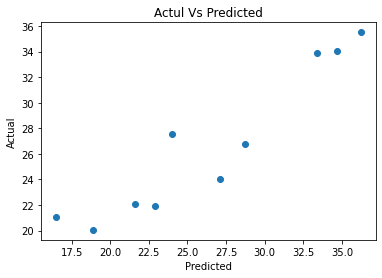

In [24]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 "Save" the prediction results to csv** 
---

In [25]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.7 Download the "result file" to user local system** 
---

In [26]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.8 "Save" the trained model** 
---

In [27]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **4.9 Download the "trained model file" to user local system** 
---

In [28]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.10.1 Upload the  "Trained Model"**


In [29]:
from google.colab import files
#files.upload()                    # Uncomment this line

---
### **4.10.2 Load the "Model"**
---

In [30]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

---
### **4.10.3 Make the prediction on "new unseen dataset"**
---

In [31]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.520000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.067000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.006001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.852001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.508001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.784001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.935000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,24.026000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,21.023000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.051000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [32]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1448,30.8862,5.5575,0.6302,0.2358,0.1918
1,1.8492,6.2178,2.4936,0.9079,0.1439,0.1183
2,2.5568,17.2941,4.1586,0.8217,0.1305,0.0996
3,2.6680,15.7930,3.9740,0.7324,0.1853,0.1508
4,2.5265,12.0825,3.4760,0.7792,0.1577,0.1253
5,2.8817,32.0692,5.6630,0.6946,0.1832,0.1107
6,2.3302,9.7352,3.1201,0.8689,0.1591,0.1247
7,2.0169,6.7209,2.5925,0.9419,0.1100,0.0881
8,2.1965,10.3902,3.2234,0.9104,0.1597,0.1145
9,1.5563,3.9717,1.9929,0.9643,0.0963,0.0736


---
### **5.2 Plot the "error"**
---

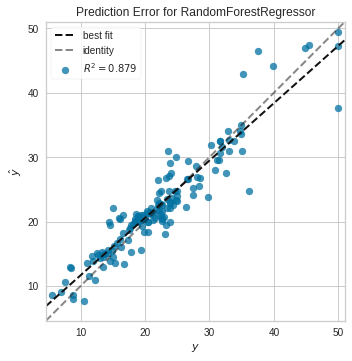

In [33]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

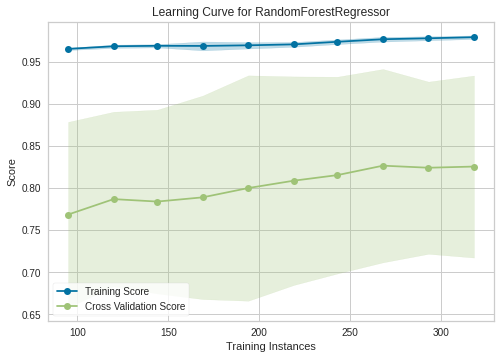

In [34]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

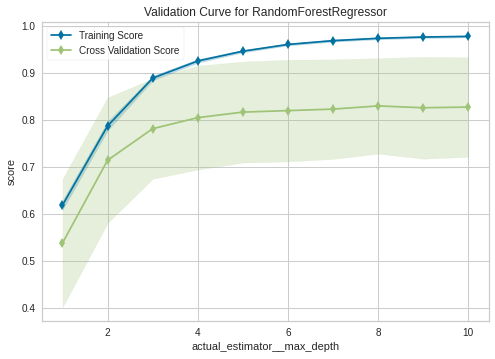

In [35]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [36]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


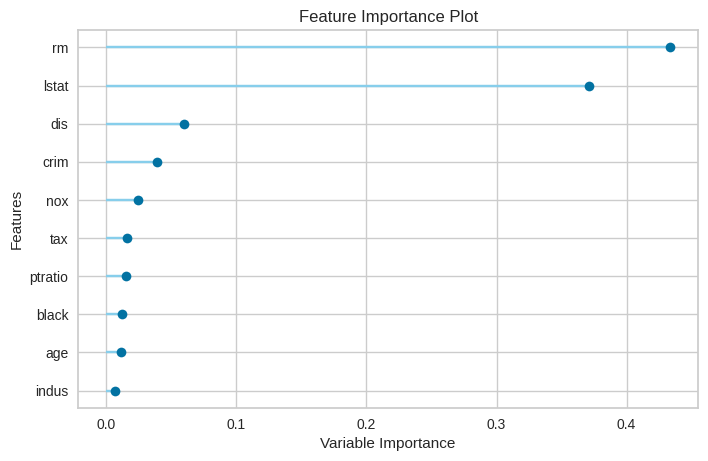

In [37]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

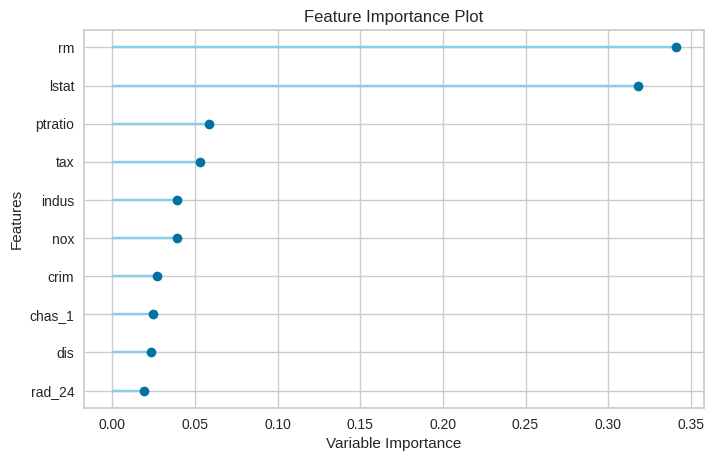

In [38]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

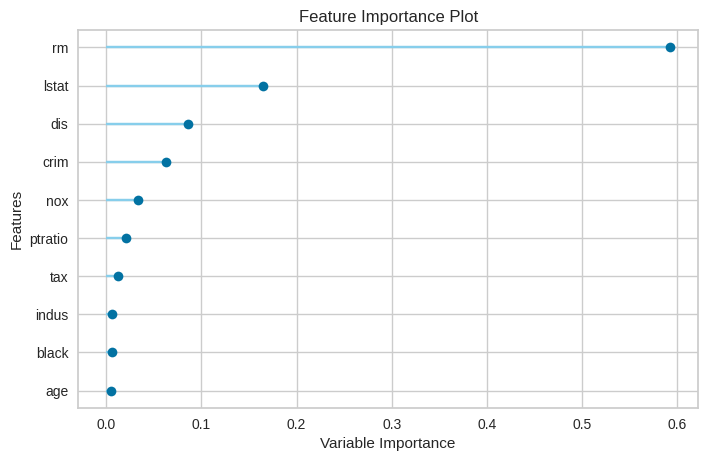

In [39]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [40]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.4778,73.6761,8.5835,0.1179,0.3177,0.2643
1,2.3333,10.2178,3.1965,0.8487,0.1653,0.1376
2,3.8583,54.3931,7.3752,0.4391,0.2669,0.1610
3,3.1194,15.1347,3.8903,0.7435,0.1895,0.1649
4,4.0314,27.1689,5.2124,0.5036,0.2752,0.2123
5,2.8400,13.5766,3.6846,0.8707,0.1643,0.1363
6,2.8057,17.0989,4.1351,0.7697,0.2072,0.1525
7,2.5371,10.0246,3.1662,0.9134,0.1456,0.1235
8,2.9000,13.5266,3.6778,0.8833,0.1723,0.1420
9,2.7429,12.5794,3.5467,0.8869,0.1443,0.1216


#### **Get the "parameters" of Decision Tree**

In [41]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [42]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4399,39.5925,6.2923,0.5260,0.2413,0.1929
1,2.1141,8.9123,2.9853,0.8680,0.1663,0.1359
2,3.5256,43.3765,6.5861,0.5527,0.2146,0.1334
3,3.0841,16.2304,4.0287,0.7249,0.2028,0.1768
4,3.2031,19.9823,4.4702,0.6349,0.1946,0.1637
5,3.4700,42.0446,6.4842,0.5996,0.2208,0.1360
6,3.1264,17.4431,4.1765,0.7651,0.1961,0.1615
7,2.6546,13.2465,3.6396,0.8856,0.1496,0.1148
8,2.2070,11.0702,3.3272,0.9045,0.1625,0.1084
9,2.6148,9.2848,3.0471,0.9165,0.1369,0.1170


#### **Get the "tuned parameters" of Decision Tree**

In [43]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,15
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.01
min_impurity_split,None
min_samples_leaf,6
min_samples_split,5
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html">Click Here</a>**
